<a href="https://colab.research.google.com/github/myDSMLProjects/Kaggle_Projects/blob/master/Microsoft_Store_EDA_with_Plotly_and_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving msft.csv to msft.csv


{'msft.csv': b'Name,Rating,No of people Rated,Category,Date,Price\nDynamic Reader,3.5,268,Books,07-01-2014,Free\n"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3,627,Books,08-01-2014,Free\nBookViewer,3.5,593,Books,29-02-2016,Free\nBrick Instructions,3.5,684,Books,30-01-2018,Free\nIntroduction to Python Programming by GoLearningBus,2,634,Books,30-01-2018,Free\nGurbani Reader,4.5,399,Books,18-01-2017,Free\nNFO Viewer,4.5,566,Books,13-11-2012,Free\nText to Speech TTS,3,175,Books,17-10-2013,Free\nACK Comics,4,460,Books,20-12-2012,Free\nLearn Biology and Human Body Anatomy by GoLearningBus,3.5,363,Books,25-11-2013,Free\nCoding Made Easy - SQL,4,774,Books,30-01-2018,Free\nBaani : Nitnem,4,533,Books,29-08-2014,Free\niMac\xc2\xae 101,4,707,Books,28-03-2014,Free\nComplete C Programs,4,687,Books,07-12-2012,Free\nHistorical Places in India,4.5,825,Books,18-02-2018,Free\nNCERT Grade 11 Chemistry via Videos by GoLearningBus,3.5,147,Books,12-05-2015,Free\nIPC sections,1,931

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/msft.csv', parse_dates=['Date'])
data.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,2014-07-01,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free
2,BookViewer,3.5,593,Books,2016-02-29,Free
3,Brick Instructions,3.5,684,Books,2018-01-30,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free


In [5]:
df = data.copy()
df1 = data.copy()
df_copy = data.copy()

In [6]:
mapping_dict = {
5.0:'good',
4.5:'good',    
4.0:'good',    
3.5:'average',     
3.0:'average',     
2.5:'average',     
2.0:'poor',     
1.5:'poor',      
1.0:'poor',     
}

df.loc[:,'Rating'] = df.Rating.map(mapping_dict)
df.dropna(inplace=True)
df.head()


,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,average,268,Books,2014-07-01,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",average,627,Books,2014-08-01,Free
2,BookViewer,average,593,Books,2016-02-29,Free
3,Brick Instructions,average,684,Books,2018-01-30,Free
4,Introduction to Python Programming by GoLearni...,poor,634,Books,2018-01-30,Free


In [7]:
df.Rating.value_counts()

good       3167
average    1735
poor        419
Name: Rating, dtype: int64

In [8]:
for row in range(df.shape[0]):
  if df.loc[row, 'Price'] != 'Free':
    df.loc[row, 'Price'] = 'Paid'
df.tail()

,Name,Rating,No of people Rated,Category,Date,Price
5316,Get Color,average,785,Developer Tools,2019-08-08,Paid
5317,JS King,poor,720,Developer Tools,2018-07-19,Paid
5318,MQTTSniffer,average,500,Developer Tools,2017-10-04,Paid
5319,"Dev Utils - JSON, CSV and XML",good,862,Developer Tools,2019-11-18,Paid
5320,Simply Text,good,386,Developer Tools,2014-01-23,Paid


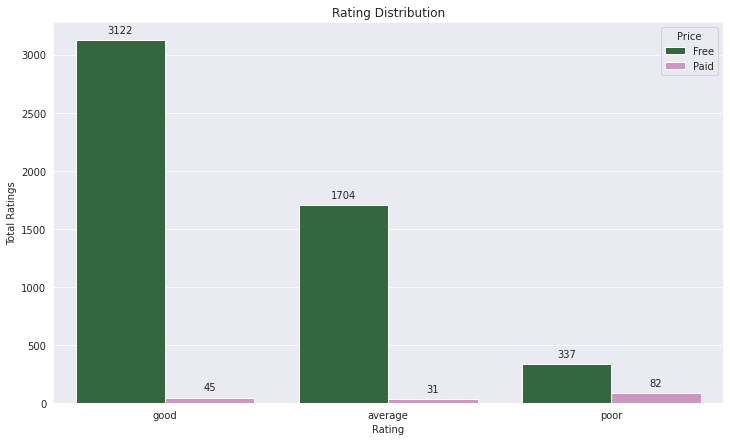

In [9]:
plt.figure(figsize=(12,7))
g = sns.countplot(df.Rating, hue=df.Price, palette="cubehelix", order=['good', 'average', 'poor'])
for p in g.patches:
  g.annotate(p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
g.set_ylabel('Total Ratings')
g.set_title('Rating Distribution')
plt.show()

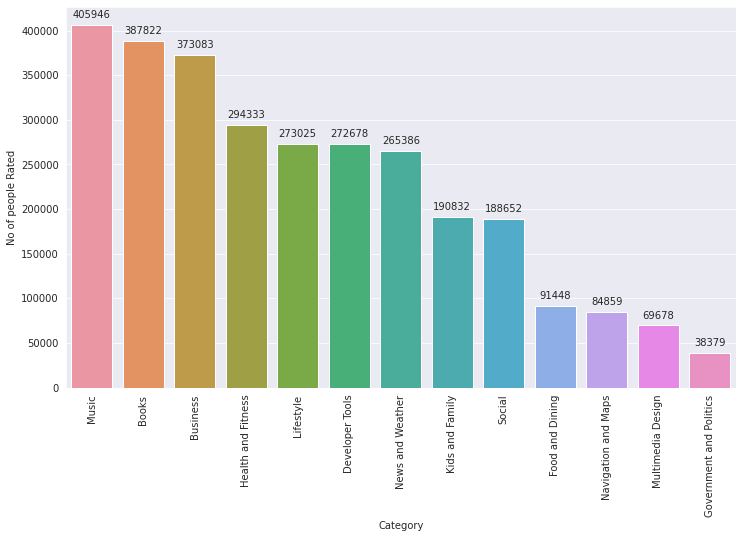

In [10]:
plt.figure(figsize=(12,7))
cat_df = df_copy.groupby(['Category'])['No of people Rated'].sum().sort_values(ascending=False).reset_index()
g = sns.barplot(x='Category', y='No of people Rated', data=cat_df)
for p in g.patches:
  g.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

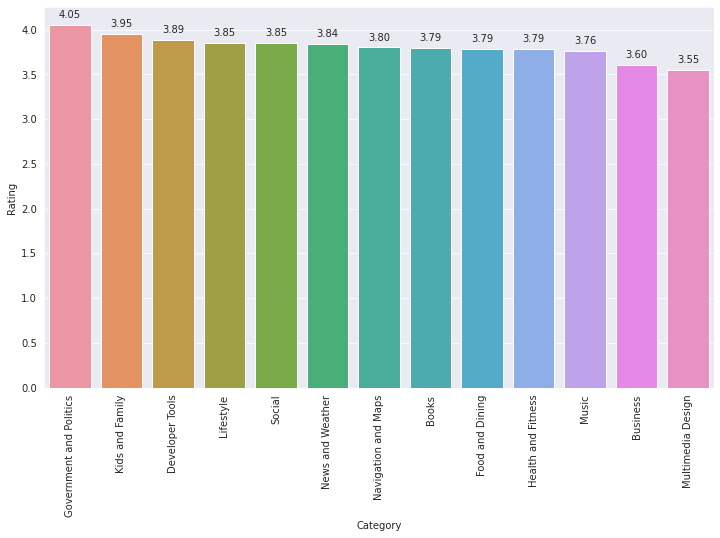

In [11]:
plt.figure(figsize=(12,7))
rate_df = df1.groupby(['Category'])['Rating'].mean().sort_values(ascending=False).reset_index()
g = sns.barplot(x='Category', y='Rating', data=rate_df)
for p in g.patches:
  g.annotate(format(p.get_height(), '0.2f'), (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0,10), textcoords = 'offset points')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [12]:
percentage_free = format(df.Price.value_counts()['Free']/len(df)*100, '0.2f')
percentage_paid = format(df.Price.value_counts()['Paid']/len(df)*100, '0.2f')
print(percentage_free, percentage_paid)

97.03 2.97


In [13]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=['Free Apps','Paid Apps'],
                             values=[percentage_free, percentage_paid])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [14]:
import plotly.express as px
fig = px.pie(df, names='Rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [15]:
import datetime
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Name,Rating,No of people Rated,Category,Date,Price,Year
0,Dynamic Reader,average,268,Books,2014-07-01,Free,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",average,627,Books,2014-08-01,Free,2014
2,BookViewer,average,593,Books,2016-02-29,Free,2016
3,Brick Instructions,average,684,Books,2018-01-30,Free,2018
4,Introduction to Python Programming by GoLearni...,poor,634,Books,2018-01-30,Free,2018


In [16]:
df_year = df.groupby(['Year', 'Category'])['No of people Rated'].sum()
df_year = pd.DataFrame(df_year.reset_index())
df

,Name,Rating,No of people Rated,Category,Date,Price,Year
0,Dynamic Reader,average,268,Books,2014-07-01,Free,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",average,627,Books,2014-08-01,Free,2014
2,BookViewer,average,593,Books,2016-02-29,Free,2016
3,Brick Instructions,average,684,Books,2018-01-30,Free,2018
4,Introduction to Python Programming by GoLearni...,poor,634,Books,2018-01-30,Free,2018
...,...,...,...,...,...,...,...
5316,Get Color,average,785,Developer Tools,2019-08-08,Paid,2019
5317,JS King,poor,720,Developer Tools,2018-07-19,Paid,2018
5318,MQTTSniffer,average,500,Developer Tools,2017-10-04,Paid,2017
5319,"Dev Utils - JSON, CSV and XML",good,862,Developer Tools,2019-11-18,Paid,2019


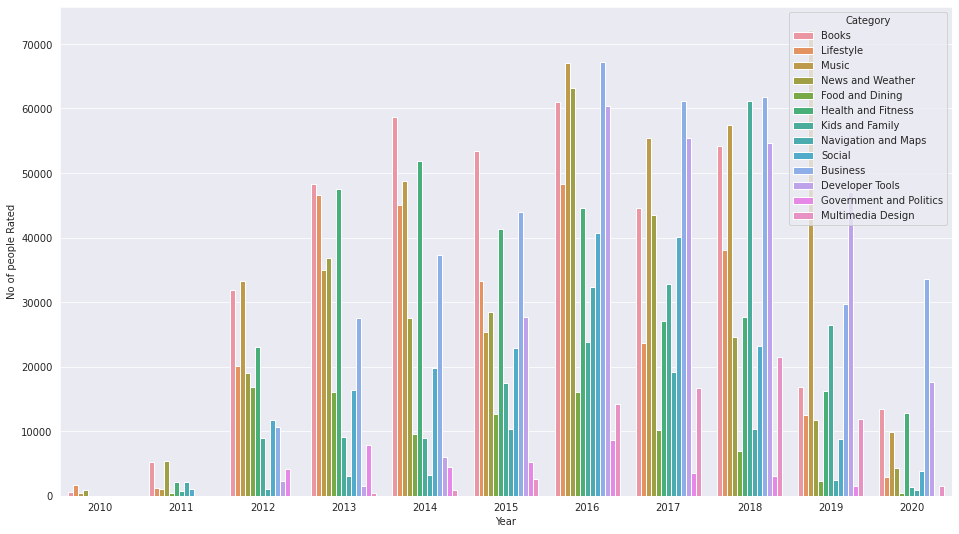

In [17]:
plt.figure(figsize=(16,9))
g = sns.barplot(x='Year', y='No of people Rated', data = df_year, hue='Category')
plt.show()

In [18]:
df_total_people = pd.DataFrame(df1.groupby(['Category'])['No of people Rated'].sum().reset_index())
df_avg_rating = pd.DataFrame(df1.groupby(['Category'])['Rating'].mean().reset_index())

In [19]:
df_final = df_total_people 
df_final['Average Rating'] = df_avg_rating['Rating']
df_final

,Category,No of people Rated,Average Rating
0,Books,387822,3.791372
1,Business,373083,3.602356
2,Developer Tools,272678,3.886000
3,Food and Dining,91448,3.789157
4,Government and Politics,38379,4.050000
5,Health and Fitness,294333,3.785579
6,Kids and Family,190832,3.947826
7,Lifestyle,273025,3.850610
8,Multimedia Design,69678,3.551282
9,Music,405946,3.759628


In [20]:
fig = px.scatter(df_final, x='Average Rating', y='Category', size='No of people Rated', color='Category')
fig.show()

In [21]:
df.tail()

,Name,Rating,No of people Rated,Category,Date,Price,Year
5316,Get Color,average,785,Developer Tools,2019-08-08,Paid,2019
5317,JS King,poor,720,Developer Tools,2018-07-19,Paid,2018
5318,MQTTSniffer,average,500,Developer Tools,2017-10-04,Paid,2017
5319,"Dev Utils - JSON, CSV and XML",good,862,Developer Tools,2019-11-18,Paid,2019
5320,Simply Text,good,386,Developer Tools,2014-01-23,Paid,2014


In [22]:
df_paid = df[df.Price=='Paid']
df_paid

,Name,Rating,No of people Rated,Category,Date,Price,Year
5163,Bluestacks app player: guide,poor,760,Books,2019-12-16,Paid,2019
5164,Adobe Acrobat Reader DC PC Guide,poor,163,Books,2020-06-28,Paid,2020
5165,Play Books Online (Client For Google Books),average,292,Books,2016-01-14,Paid,2016
5166,WinRAR PC-Guide,poor,523,Books,2019-11-22,Paid,2019
5167,Windows Movie Maker : PC Guide,poor,515,Books,2020-06-22,Paid,2020
...,...,...,...,...,...,...,...
5316,Get Color,average,785,Developer Tools,2019-08-08,Paid,2019
5317,JS King,poor,720,Developer Tools,2018-07-19,Paid,2018
5318,MQTTSniffer,average,500,Developer Tools,2017-10-04,Paid,2017
5319,"Dev Utils - JSON, CSV and XML",good,862,Developer Tools,2019-11-18,Paid,2019


In [23]:
df_paid.Category.value_counts()

Books              56
Business           52
Developer Tools    50
Name: Category, dtype: int64

In [24]:
paid_perc_poor = format(df_paid.Rating.value_counts()['poor']/df_paid.Rating.value_counts().sum()*100, '0.2f')
paid_perc_good = format(df_paid.Rating.value_counts()['good']/df_paid.Rating.value_counts().sum()*100, '0.2f')
paid_perc_average = format(df_paid.Rating.value_counts()['average']/df_paid.Rating.value_counts().sum()*100, '0.2f')

In [25]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=['poor','good','average'],
                              values=[paid_perc_poor, paid_perc_good, paid_perc_average])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of Ratings of Paid Apps', font_size=20)
fig.show()

In [26]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=['Free Apps','Paid Apps'],
                             values=[percentage_free, percentage_paid])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [27]:
# Top 20 highly priced Apps

df_price = df1[df1.Price!='Free'].dropna()
df_price['Price_new'] = df_price.Price.str.split(expand=True)[1]
df_price.drop('Price', axis=1, inplace=True)
df_price['Price_new'] = df_price['Price_new'].str.replace(',','')
df_price['Price_new'] = df_price['Price_new'].astype(float)
df_top_priced = df_price.sort_values(by='Price_new', ascending=False).head(20)
df_top_priced = df_top_priced.reset_index(drop=True)
df_top_priced


,Name,Rating,No of people Rated,Category,Date,Price_new
0,Pengwin Enterprise,3.0,368,Developer Tools,2018-11-29,5449.0
1,EasyReader,4.0,990,Books,2019-10-07,2599.0
2,RocketCake Professional,4.0,691,Developer Tools,2016-08-12,2149.0
3,EditPlus,4.0,778,Developer Tools,2016-09-27,1899.0
4,Oxford Dictionary of English and Thesaurus,3.0,290,Books,2015-01-23,1624.0
5,Office Suite - Powerful editor for Adobe pdf a...,4.0,352,Business,2017-01-12,1624.0
6,"Oxford Advanced Learner's Dictionary, 8th edition",4.0,403,Books,2013-01-31,1624.0
7,"Grapholite - Diagrams, Flow Charts and Floor P...",4.0,287,Business,2013-02-22,1521.8
8,Oxford Dictionary of English,4.0,391,Books,2014-07-22,1349.0
9,Offline Documentation Browser,1.0,153,Developer Tools,2020-03-13,1149.0


In [28]:
fig = px.bar(df_top_priced, x='Price_new', y='Name',
             hover_data=['Rating', 'No of people Rated'], color='Category',
             height=800, orientation='h', color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    title="Top 20 Paid Apps - Category wise",
    xaxis_title="Pricing(₹)",
    yaxis_title=None
    )
fig.show()